In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import *

In [ ]:
class inception_block(Layer):
  '''
  To find optimal local sparse representation
  -- > layer by layer
  -- > high correlation previous layers are clustered - lower levels can be covered with a 1x1 kernel  == clustered region becomes extremely dense
                    == small number of clusters in higher levels can be covered with bigger kernels
  '''
  def __init__(self, filters, name_prefix=''):
    super().__init__(name=name_prefix)
    self.filters = filters
    self.convolution1 = Conv2D(kernel_size=1, filters=self.filters[0], padding='same')
    self.convolution2 = Conv2D(kernel_size=1, filters=self.filters[1], padding='same')
    self.convolution3 = Conv2D(kernel_size=3, filters=self.filters[2], padding='same')
    self.convolution4 = Conv2D(kernel_size=1, filters=self.filters[3], padding='same')
    self.convolution5 = Conv2D(kernel_size=5, strides=1, padding='same', filters=self.filters[4])
    self.convolution6 = Conv2D(filters=self.filters[5], kernel_size=1, strides=1)
    self.activation = ReLU()
    self.pool = MaxPool2D(pool_size=3, strides=1, padding='same')

  def call(self, inputs):
    c1 = self.convolution1(inputs)
    c1 = self.activation(c1)

    c2 = self.convolution2(inputs)
    c2 = self.activation(c2)
    c2 = self.convolution3(c2)
    c2 = self.activation(c2)

    c3 = self.convolution4(inputs)
    c3 = self.activation(c3)
    c3 = self.convolution5(c3)
    c3 = self.activation(c3)

    c4 = self.pool(inputs)
    c4 = self.convolution6(c4)
    return Concatenate()([c1,c2,c3,c4])



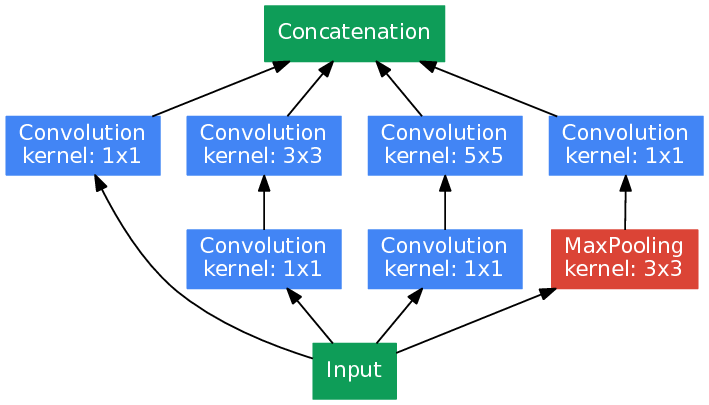

INCEPTION MODULE


In [ ]:
from keras import Model
filters=[64,96,128,16,32,32]

inputs = Input(shape=(27,27,192), name='Input')

kernel1 = Conv2D(kernel_size=1, filters=filters[0], padding='same', name= '1x1_Kernel')(inputs)
activated1 = ReLU(name='activate')(kernel1)

kernel2 = Conv2D(kernel_size=1, filters=filters[1], padding='same', name='1x1_Kernel_')(inputs)
activated2 = ReLU(name='activate_')(kernel2)
kernel2 = Conv2D(kernel_size=3, filters=filters[2], padding='same', name='3x3_Kernel')(activated2)
activated2 = ReLU(name='activate__')(kernel2)

kernel3 = Conv2D(kernel_size=1, filters=filters[3], padding='same', name='1x1_Kernel__')(inputs)
activated3 = ReLU(name='activate___')(kernel3)
kernel3 = Conv2D(kernel_size=5, filters=filters[4], padding='same', name='5x5_Kernel')(activated3)
activated3 = ReLU(name='activate____')(kernel3)

pooled_outputs = MaxPool2D(pool_size=3, strides=1, padding='same', name='MaxPooling')(inputs)
kernel4 = Conv2D(filters=filters[5], kernel_size=1, strides=1, name='1x1_Kernel____')(pooled_outputs)

outputs = Concatenate()([activated1, activated2, activated3, kernel4])

inception_module = Model(inputs=inputs, outputs=outputs)

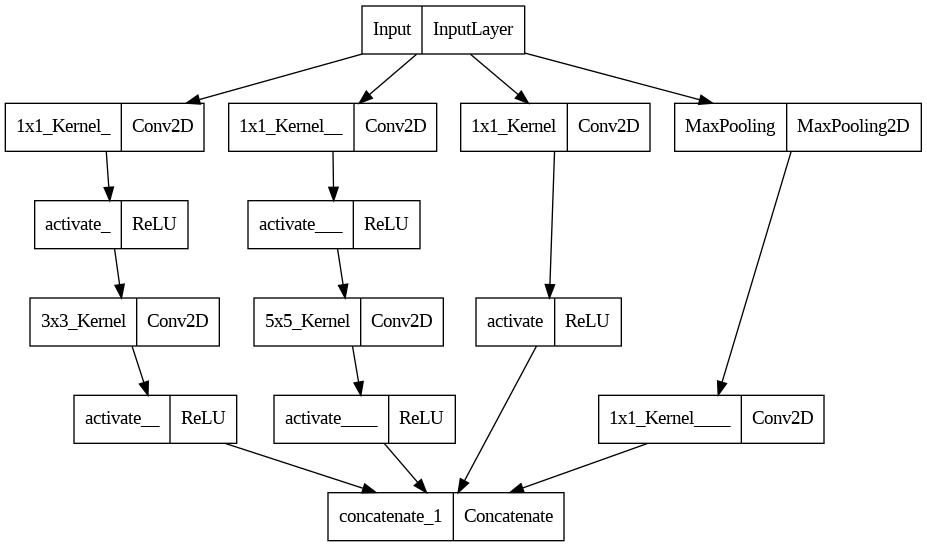

In [ ]:
keras.utils.plot_model(inception_module)

In [ ]:
def build_model():

  from keras import Model

  input = Input(shape=(224,224,3), name='Input')
  x = Conv2D(kernel_size=7, filters=64, strides=2, padding='same', activation='relu', name='Conv1')(input)
  x = MaxPool2D(pool_size=3, strides=2, padding='same', name='Pool1')(x)
  x = Conv2D(kernel_size=3, strides=1, activation='relu', filters=192, name='Conv2')(x)
  x = MaxPool2D(pool_size=3, strides=2, padding='same', name='Pool2')(x)
  x = inception_block(filters=[64,96,128,16,32,32], name_prefix='Inception_1')(x)
  x = inception_block(filters=[128,128,192,32,96,64], name_prefix='Inception_2')(x)
  x = MaxPool2D(pool_size=3, strides=2, padding='same', name='Pool3')(x)
  x = inception_block(filters=[192, 96, 208, 16, 48, 64], name_prefix='Inception_3')(x)
  x = inception_block(filters=[160, 112, 224, 24, 64, 64], name_prefix='Inception_4')(x)
  x = inception_block(filters=[128, 128, 256, 24, 64, 64], name_prefix='Inception_5')(x)
  x = inception_block(filters=[112, 144, 288, 32, 64, 64], name_prefix='Inception_6')(x)
  x = inception_block(filters=[256, 160, 320, 32, 128, 128], name_prefix='Inception_7')(x)
  x = MaxPool2D(pool_size=3, strides=2, padding='same', name='Pool4')(x)
  x = inception_block(filters=[256, 160, 320, 32, 128, 128], name_prefix='Inception_8')(x)
  x = inception_block(filters=[384, 192, 384, 48, 128, 128], name_prefix='Inception_9')(x)
  x = AveragePooling2D(pool_size=7, strides=1, name='Avgpool')(x)
  x = Dropout(rate=.4, name='Dropout')(x)
  x = Flatten(name='Flatten')(x)
  x = Dense(1000, activation='softmax', name='FC')(x)

  return Model(input, x)

In [ ]:
googleNet = build_model()

In [ ]:
googleNet.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 Conv1 (Conv2D)              (None, 112, 112, 64)      9472      
                                                                 
 Pool1 (MaxPooling2D)        (None, 56, 56, 64)        0         
                                                                 
 Conv2 (Conv2D)              (None, 54, 54, 192)       110784    
                                                                 
 Pool2 (MaxPooling2D)        (None, 27, 27, 192)       0         
                                                                 
 Inception_1 (inception_blo  (None, 27, 27, 256)       163696    
 ck)                                                             
                                                           